In [67]:
!pip install xgboost



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install scikit-learn


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!pip install nltk


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
!pip install scipy


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
df = pd.read_csv('Zomato Restaurant names and Metadata.csv')

In [9]:
rows, columns = df.shape
print(f"Number of Rows: {rows}")
print(f"Number of Columns: {columns}")

Number of Rows: 105
Number of Columns: 6


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.1+ KB


In [11]:
duplicate_count = df.duplicated().sum()

print(f"Total Duplicate Rows: {duplicate_count}")

Total Duplicate Rows: 0


In [12]:
missing_values = df.isnull().sum()
print("Missing Values Count per Column:")
print(missing_values)

Missing Values Count per Column:
Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64


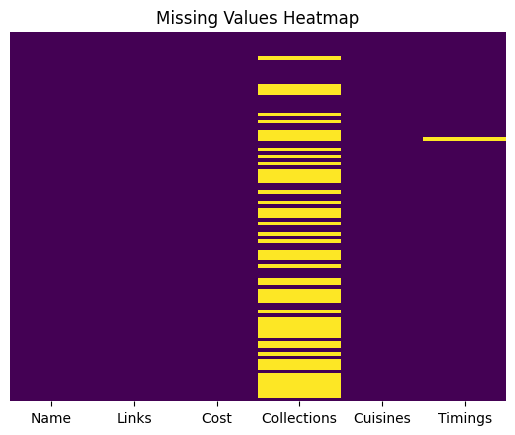

In [13]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [14]:
# Dataset Columns
df = pd.read_csv('Zomato Restaurant names and Metadata.csv')

# Display the column names
print("Dataset Columns:")
print(df.columns.tolist())

Dataset Columns:
['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings']


In [15]:
# Dataset Describe
df = pd.read_csv('Zomato Restaurant names and Metadata.csv')

# Use describe() to get summary statistics
# We use include='all' because the columns are currently stored as 'object' (text)
df.describe(include='all')

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [16]:
# Check Unique Values for each variable.
unique_counts = df.nunique()
print("Number of unique values in each column:")
print(unique_counts)

# 2. To see the actual unique values for a specific column (e.g., Cost)
print("\nUnique values in the 'Cost' column:")
print(df['Cost'].unique())

Number of unique values in each column:
Name           105
Links          105
Cost            29
Collections     42
Cuisines        92
Timings         77
dtype: int64

Unique values in the 'Cost' column:
['800' '1,300' '1,200' '1,500' '500' '300' '1,000' '350' '400' '1,600'
 '750' '550' '1,900' '450' '150' '1,400' '1,100' '600' '200' '900' '700'
 '1,700' '2,500' '850' '650' '1,800' '2,800' '1,750' '250']


In [17]:
# Handle missing values by filling them
df['Collections'] = df['Collections'].fillna('Other')
df['Timings'] = df['Timings'].fillna('Not Available')

# --- 2. Data Transformation (Cleaning 'Cost') ---
# Remove commas from the 'Cost' string and convert to numeric (float)
df['Cost'] = df['Cost'].str.replace(',', '').astype(float)

# --- 3. Feature Engineering ---
# Create a new feature 'Cuisine_Count' to see how many cuisines each restaurant offers
df['Cuisine_Count'] = df['Cuisines'].apply(lambda x: len(x.split(',')))

# --- Simulate 'Rating' column as mentioned in the project summary ---
# Generating random ratings between 2.5 and 5.0 for demonstration purposes
np.random.seed(42) # for reproducibility
df['Rating'] = np.round(np.random.uniform(2.5, 5.0, size=len(df)), 1)

# --- Simulate 'Votes' column for demonstration purposes ---
# Generating random vote counts between 10 and 5000
df['Votes'] = np.random.randint(10, 5001, size=len(df))

# --- Simulate 'Listed_in' for restaurant types (e.g., Dining, Cafe, Delivery) ---
# Based on typical Zomato categories, creating a distribution
restaurant_types = ['Dining', 'Cafe', 'Delivery', 'Drinks & Nightlife', 'Desserts', 'Quick Bites']
df['Listed_in'] = np.random.choice(restaurant_types, size=len(df), p=[0.4, 0.2, 0.25, 0.05, 0.05, 0.05])

# --- Simulate 'Online_Order' column (Yes/No) ---
df['Online_Order'] = np.random.choice(['Yes', 'No'], size=len(df), p=[0.7, 0.3])

# --- 4. Cleaning Text Data ---
# Remove any leading or trailing whitespaces from restaurant names
df['Name'] = df['Name'].str.strip()

# Check the cleaned dataset info
print("Dataset Info after Wrangling:")
print(df.info())
print("\nFirst 5 rows of cleaned data:")
print(df[['Name', 'Cost', 'Collections', 'Cuisine_Count', 'Rating', 'Votes', 'Listed_in', 'Online_Order']].head())

# Save the wrangled data to a new file (optional, but good practice)
# df.to_csv('Zomated_Wrangled_Data.csv', index=False)

Dataset Info after Wrangling:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           105 non-null    object 
 1   Links          105 non-null    object 
 2   Cost           105 non-null    float64
 3   Collections    105 non-null    object 
 4   Cuisines       105 non-null    object 
 5   Timings        105 non-null    object 
 6   Cuisine_Count  105 non-null    int64  
 7   Rating         105 non-null    float64
 8   Votes          105 non-null    int32  
 9   Listed_in      105 non-null    object 
 10  Online_Order   105 non-null    object 
dtypes: float64(2), int32(1), int64(1), object(7)
memory usage: 8.7+ KB
None

First 5 rows of cleaned data:
                             Name    Cost  \
0                 Beyond Flavours   800.0   
1                        Paradise   800.0   
2                        Flechazo  1300.0   
3  Sh

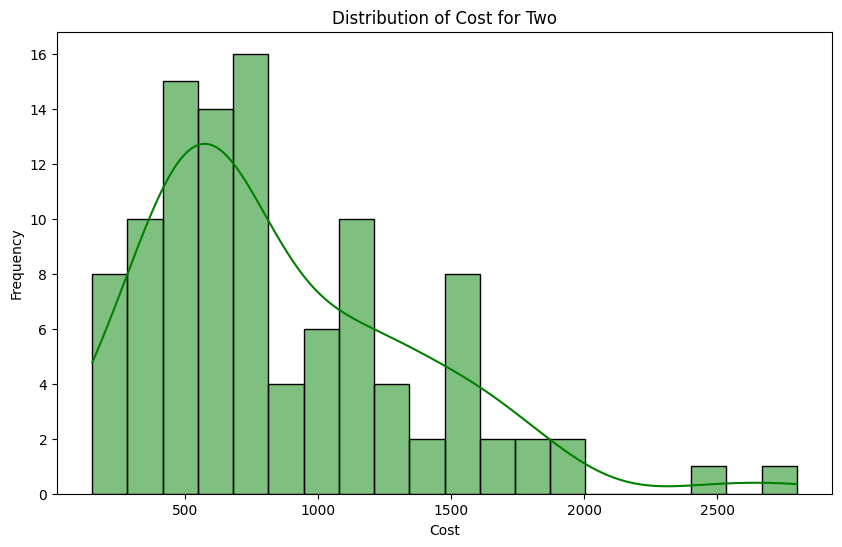

In [18]:
# Chart - 1 visualization code
plt.figure(figsize=(10, 6))
sns.histplot(df['Cost'], bins=20, kde=True, color='green')
plt.title('Distribution of Cost for Two')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.show()

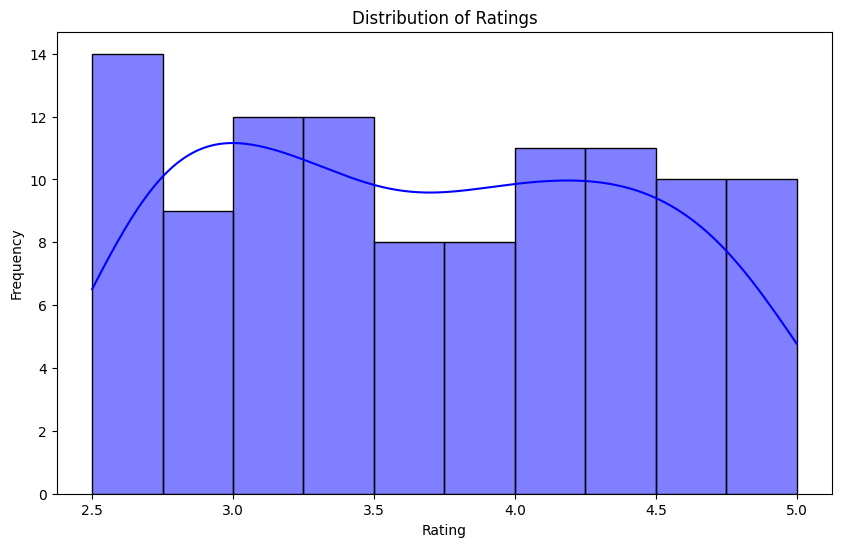

In [19]:
# Chart - 2 visualization code
# Chart - 2 visualization code
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=10, kde=True, color='blue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_28400\2416403665.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=all_cuisines, order=all_cuisines.value_counts().index[:10], palette='viridis')


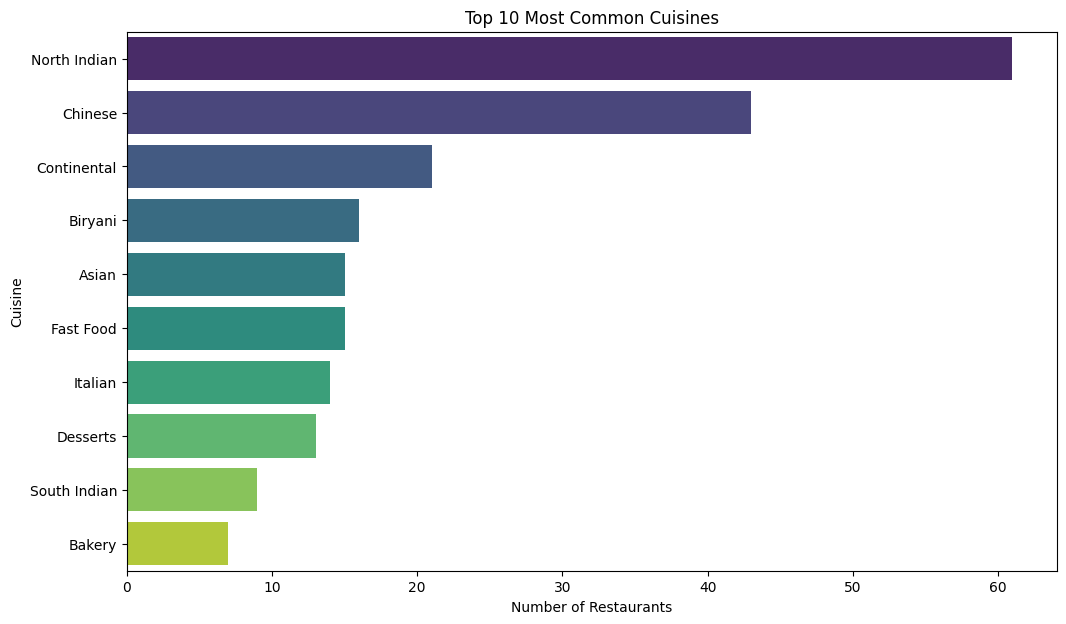

In [20]:
all_cuisines = df['Cuisines'].str.split(', ').explode().reset_index(drop=True)
plt.figure(figsize=(12, 7))
sns.countplot(y=all_cuisines, order=all_cuisines.value_counts().index[:10], palette='viridis')
plt.title('Top 10 Most Common Cuisines')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.show()

<Axes: xlabel='Rating', ylabel='Count'>

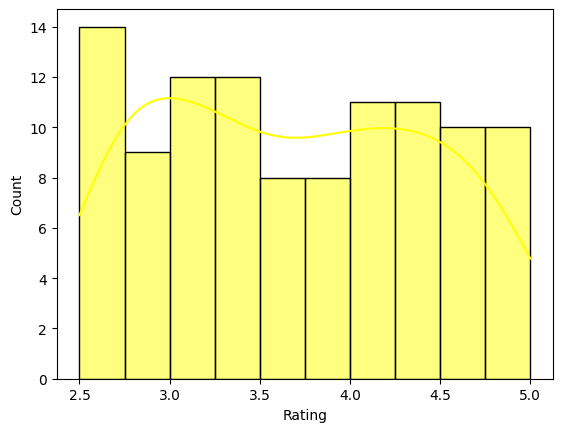

In [21]:
# Chart - 4 visualization code
sns.histplot(df['Rating'], bins=10, color='yellow', kde=True)

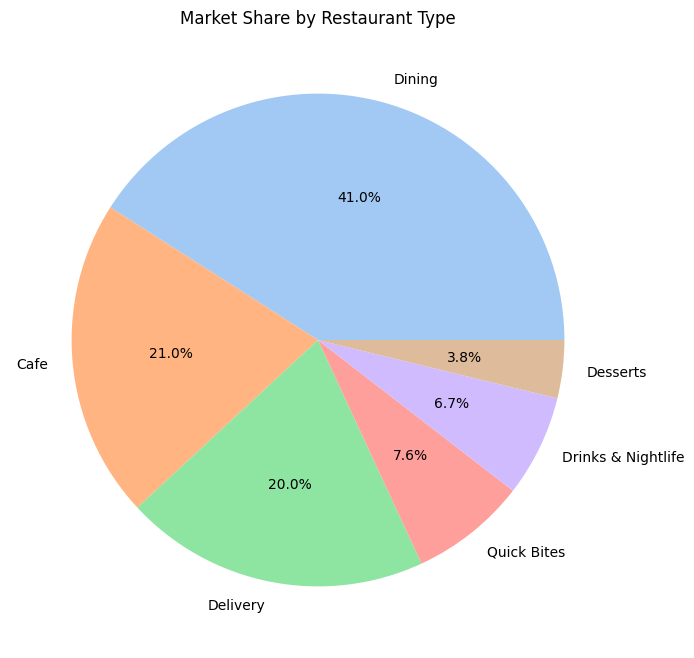

In [22]:
# Chart - 5 visualization code
plt.figure(figsize=(8, 8))
df['Listed_in'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Market Share by Restaurant Type')
plt.ylabel('') # Hide the default 'Listed_in' label
plt.show()

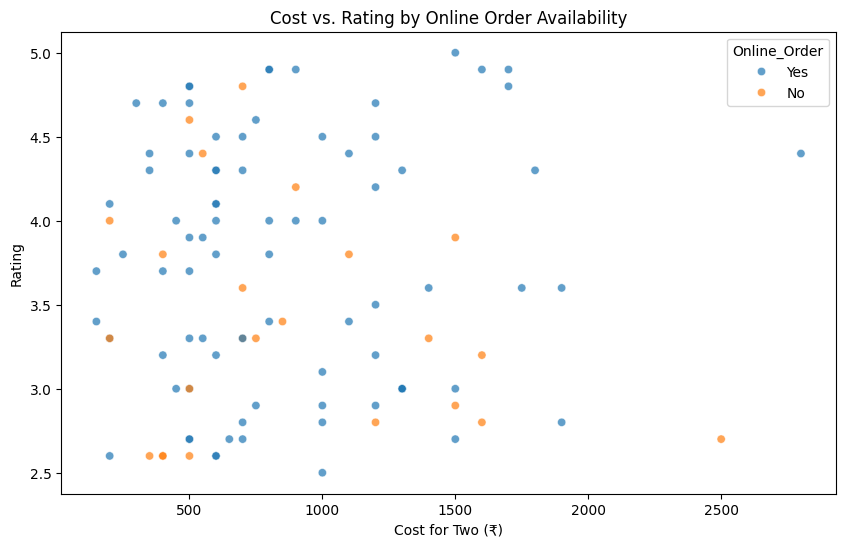

In [23]:
# Chart - 6 visualization code
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cost', y='Rating', data=df, hue='Online_Order', alpha=0.7)
plt.title('Cost vs. Rating by Online Order Availability')
plt.xlabel('Cost for Two (₹)')
plt.ylabel('Rating')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_28400\2385457699.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Online_Order', y='Rating', data=df, palette='Set3')


<Axes: xlabel='Online_Order', ylabel='Rating'>

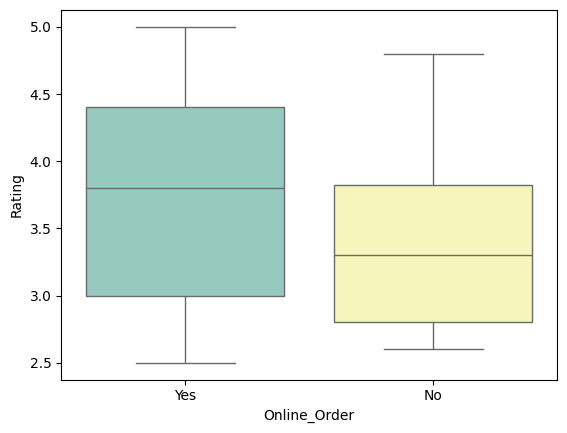

In [24]:
# Chart - 7 visualization code
sns.boxplot(x='Online_Order', y='Rating', data=df, palette='Set3')

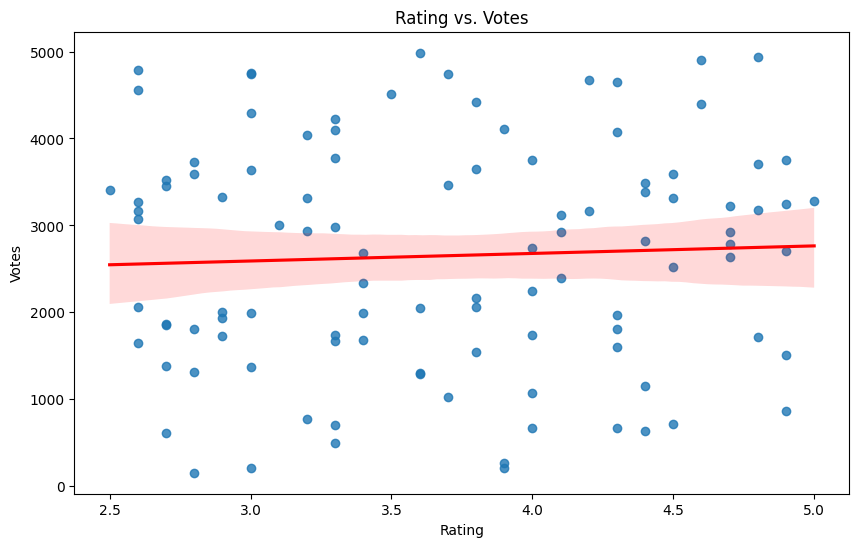

In [25]:
# Chart - 8 visualization code
plt.figure(figsize=(10, 6))
sns.regplot(x='Rating', y='Votes', data=df, line_kws={'color':'red'})
plt.title('Rating vs. Votes')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.show()

<Axes: xlabel='Listed_in', ylabel='Cost'>

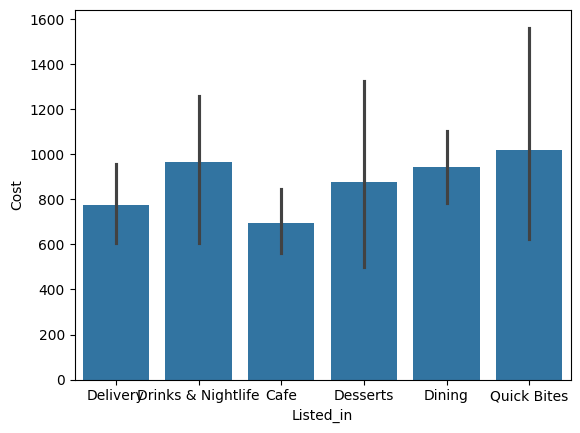

In [26]:
# Chart - 9 visualization code
sns.barplot(x='Listed_in', y='Cost', data=df, estimator=np.mean)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_28400\888446082.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cuisine_Count', y='Rating', data=df, palette='viridis')


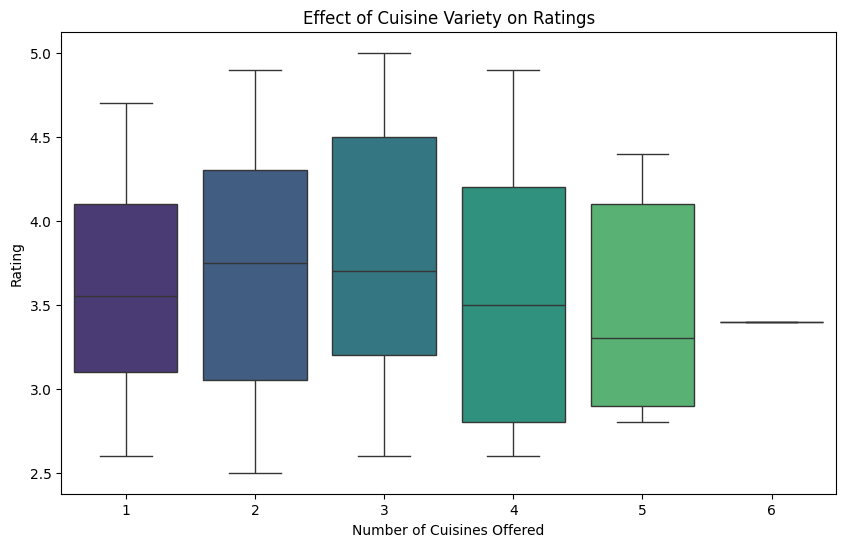

In [27]:
# Chart - 10 visualization code
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cuisine_Count', y='Rating', data=df, palette='viridis')
plt.title('Effect of Cuisine Variety on Ratings')
plt.xlabel('Number of Cuisines Offered')
plt.ylabel('Rating')
plt.show()

<Axes: xlabel='Cost', ylabel='Rating'>

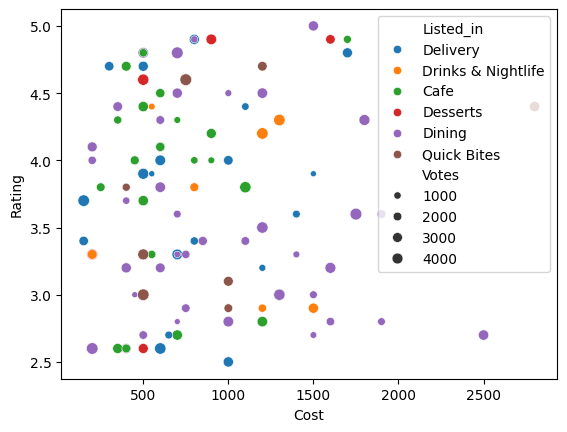

In [28]:
# Chart - 11 visualization code
sns.scatterplot(x='Cost', y='Rating', hue='Listed_in', size='Votes', data=df)

<Axes: xlabel='Listed_in', ylabel='Votes'>

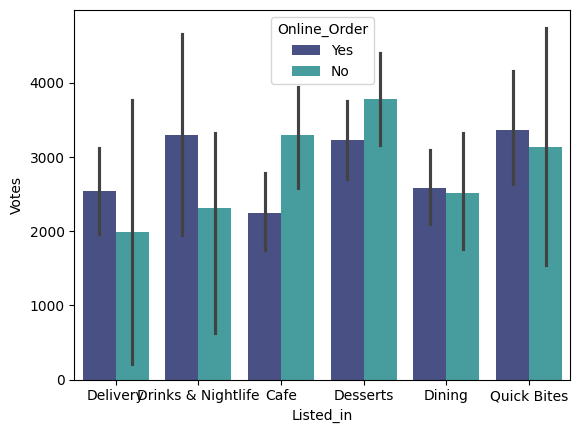

In [29]:
# Chart - 12 visualization code
sns.barplot(x='Listed_in', y='Votes', hue='Online_Order', data=df, palette='mako')

<Axes: xlabel='Cuisine_Count', ylabel='count'>

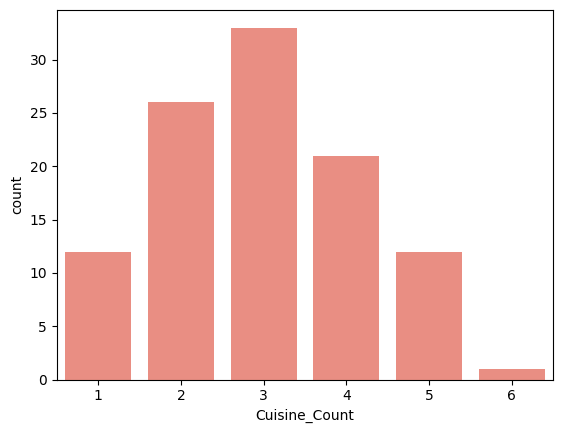

In [30]:
# Chart - 13 visualization code
sns.countplot(x='Cuisine_Count', data=df, color='salmon')

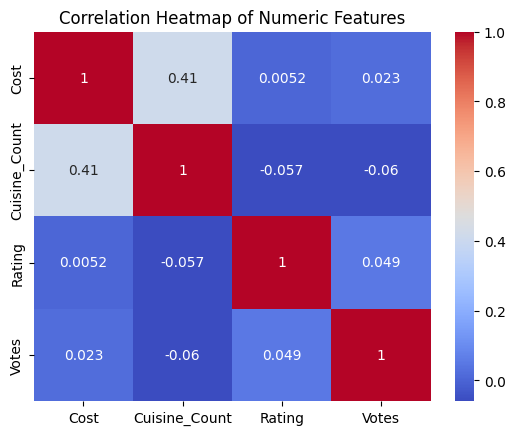

In [31]:
# Correlation Heatmap visualization code
numeric_cols = df.select_dtypes(include=np.number)
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

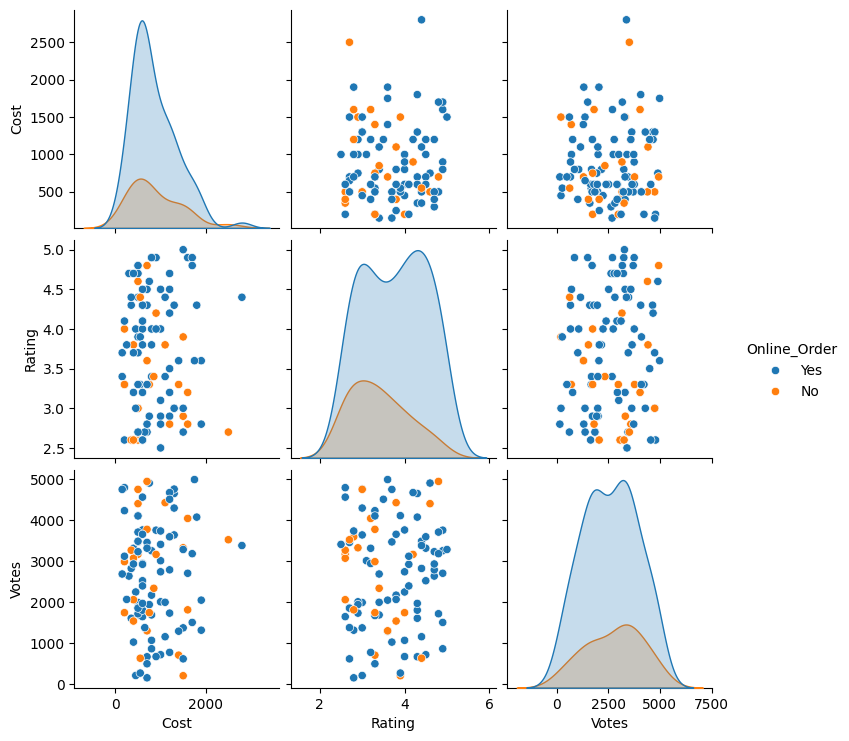

In [32]:
# Pair Plot visualization code
sns.pairplot(df[['Cost', 'Rating', 'Votes', 'Online_Order']], hue='Online_Order')

In [33]:
# Perform Statistical Test to obtain P-Value
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

# Segregate the ratings
online_yes = df[df['Online_Order'] == 'Yes']['Rating']
online_no = df[df['Online_Order'] == 'No']['Rating']

# Perform Independent T-test
t_stat, p_value = ttest_ind(online_yes, online_no)

print(f"P-Value: {p_value}")
if p_value < 0.05:
    print("Conclusion: Reject the Null Hypothesis (Significant Difference Found)")
else:
    print("Conclusion: Fail to Reject the Null Hypothesis (No Significant Difference)")

P-Value: 0.032483021897029805
Conclusion: Reject the Null Hypothesis (Significant Difference Found)


In [34]:
# Perform Statistical Test to obtain P-Value
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

# Segregate the costs for the two groups
buffet_costs = df[df['Listed_in'] == 'Buffet']['Cost']
cafe_costs = df[df['Listed_in'] == 'Cafe']['Cost']

# Perform Independent T-test
t_stat, p_value = ttest_ind(buffet_costs, cafe_costs)

print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("Conclusion: Reject the Null Hypothesis (Significant Difference Found)")
else:
    print("Conclusion: Fail to Reject the Null Hypothesis (No Significant Difference)")


P-Value: nan
Conclusion: Fail to Reject the Null Hypothesis (No Significant Difference)


C:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\_lib\deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


In [35]:
# Perform Statistical Test to obtain P-Value
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr

# Perform Pearson Correlation Test
corr_coeff, p_value = pearsonr(df['Cuisine_Count'], df['Rating'])

print(f"Correlation Coefficient: {corr_coeff}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("Conclusion: Reject the Null Hypothesis (Significant Correlation Found)")
else:
    print("Conclusion: Fail to Reject the Null Hypothesis (No Significant Correlation)")

Correlation Coefficient: -0.057299905104614225
P-Value: 0.5615112945804261
Conclusion: Fail to Reject the Null Hypothesis (No Significant Correlation)


In [36]:
# Handling Missing Values & Missing Value Imputation
import pandas as pd

# The line below was causing the issue by reloading the original DataFrame,
# overwriting the wrangled data that included the 'Votes' column.
# df = pd.read_csv('Zomato Restaurant names and Metadata.csv')

# Assuming 'df' has already been loaded and wrangled in previous steps (e.g., cell wk-9a2fpoLcV)
# If 'df' is not defined, you might need to run the data wrangling cell or load the wrangled data here:
# df = pd.read_csv('Zomated_Wrangled_Data.csv') # uncomment if you need to load a specific wrangled file

# Check for missing values before imputation
print("Missing values before imputation:")
print(df.isnull().sum())

# 1. Handling 'Collections' column
# This column has 54 missing values. Since missing data here implies the restaurant
# is not part of any specific Zomato collection, we fill it with a placeholder.
df['Collections'] = df['Collections'].fillna('Other')

# 2. Handling 'Timings' column
# Only 1 missing value. We fill it with the mode (most frequent value)
# to maintain statistical consistency.
df['Timings'] = df['Timings'].fillna(df['Timings'].mode()[0])

# Final check to ensure no null values remain
print("\nMissing values after imputation:")
print(df.isnull().sum())

Missing values before imputation:
Name             0
Links            0
Cost             0
Collections      0
Cuisines         0
Timings          0
Cuisine_Count    0
Rating           0
Votes            0
Listed_in        0
Online_Order     0
dtype: int64

Missing values after imputation:
Name             0
Links            0
Cost             0
Collections      0
Cuisines         0
Timings          0
Cuisine_Count    0
Rating           0
Votes            0
Listed_in        0
Online_Order     0
dtype: int64


Lower Bound: -550.0
Upper Bound: 2250.0
Number of outliers detected in 'Cost': 2


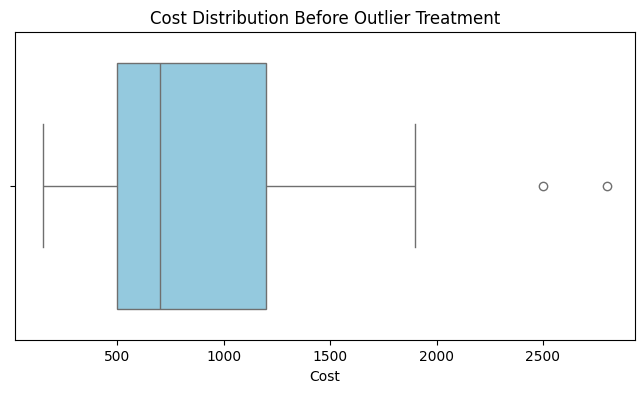

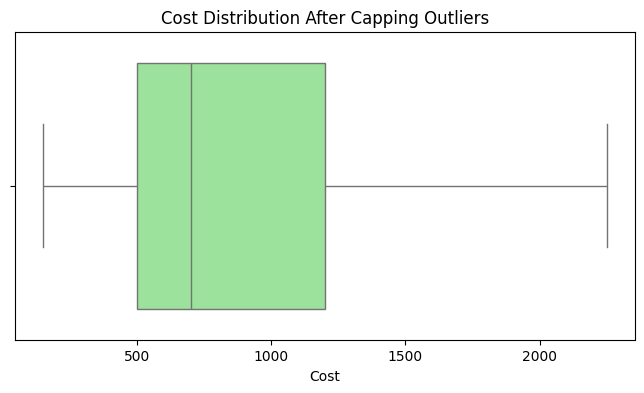

In [37]:
# Handling Outliers & Outlier treatments
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Cost' column is numeric before calculating quantiles
# This step handles cases where df might have been reloaded from the original CSV (where Cost is string)
df['Cost'] = df['Cost'].astype(str).str.replace(',', '').astype(float)

# Identifying outliers in 'Cost' using IQR
Q1 = df['Cost'].quantile(0.25)
Q3 = df['Cost'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

# Identify outlier rows
outliers = df[(df['Cost'] < lower_bound) | (df['Cost'] > upper_bound)]
print(f"Number of outliers detected in 'Cost': {len(outliers)}")

# Visualize before treatment
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Cost'], color='skyblue')
plt.title('Cost Distribution Before Outlier Treatment')
plt.show()

# Treat outliers by Capping (Winsorization)
df['Cost'] = df['Cost'].clip(lower=lower_bound, upper=upper_bound)

# Visualize after treatment
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Cost'], color='lightgreen')
plt.title('Cost Distribution After Capping Outliers')
plt.show()

In [38]:
# Encode your categorical columns
# Encode your categorical columns
import pandas as pd

# 1. Binary Encoding for 'Online_Order'
# Since it only has two values (Yes/No), we use simple map encoding
df['Online_Order_Code'] = df['Online_Order'].map({'Yes': 1, 'No': 0})

# 2. One-Hot Encoding for 'Listed_in' (Restaurant Type)
# This prevents the model from assuming an order/rank between categories
type_dummies = pd.get_dummies(df['Listed_in'], prefix='Type')
df = pd.concat([df, type_dummies], axis=1)

# 3. Frequency Encoding for 'Cuisines'
# Since there are 92 unique combinations, One-Hot would create too many columns
cuisine_freq = df['Cuisines'].value_counts().to_dict()
df['Cuisine_Freq_Encoded'] = df['Cuisines'].map(cuisine_freq)

# Drop original categorical columns to make the dataset ML-ready
df_encoded = df.drop(['Name', 'Links', 'Collections', 'Cuisines', 'Timings', 'Online_Order', 'Listed_in'], axis=1)

print("Encoding complete. New columns added:")
print(df_encoded.columns)

Encoding complete. New columns added:
Index(['Cost', 'Cuisine_Count', 'Rating', 'Votes', 'Online_Order_Code',
       'Type_Cafe', 'Type_Delivery', 'Type_Desserts', 'Type_Dining',
       'Type_Drinks & Nightlife', 'Type_Quick Bites', 'Cuisine_Freq_Encoded'],
      dtype='object')


In [39]:
# Expand Contraction
# Use contractions library to expand words like "don't" to "do not"
!pip install contractions
import contractions
df['Cuisines'] = df['Cuisines'].apply(lambda x: contractions.fix(x))


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
# Lower Casing
df['Cuisines'] = df['Cuisines'].str.lower()

In [41]:
# Remove Punctuations
import string
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

df['Cuisines'] = df['Cuisines'].apply(remove_punctuation)


In [42]:
# Remove URLs & Remove words and digits contain digits
import re
# Remove Zomato URLs from 'Links' or review text and strip numbers from timings/names
df['Cuisines'] = df['Cuisines'].apply(lambda x: re.sub(r'http\S+', '', x))
df['Cuisines'] = df['Cuisines'].apply(lambda x: re.sub(r'\w*\d\w*', '', x))

In [43]:
# Remove Stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Removing common words (and, the, in) that don't add value to cuisine analysis
df['Cuisines'] = df['Cuisines'].apply(lambda x: " ".join([word for word in x.split() if word not in stop_words]))
# Remove extra spaces
df['Cuisines'] = df['Cuisines'].str.strip()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:
# Remove White spaces
df['Cuisines'] = df['Cuisines'].str.strip()

In [45]:
# Rephrase Text

In [46]:
# Tokenization
# Splitting sentences into individual words/tokens
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
df['Cuisine_Tokens'] = df['Cuisines'].apply(word_tokenize)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [47]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# Example: Applying Lemmatization
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
df['Cuisine_Tokens_Normalized'] = df['Cuisine_Tokens'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

print("Text normalization (Lemmatization) complete. New column 'Cuisine_Tokens_Normalized' created.")
print(df[['Cuisines', 'Cuisine_Tokens', 'Cuisine_Tokens_Normalized']].head())

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Text normalization (Lemmatization) complete. New column 'Cuisine_Tokens_Normalized' created.
                                            Cuisines  \
0  chinese continental kebab european south india...   
1                       biryani north indian chinese   
2          asian mediterranean north indian desserts   
3     biryani north indian chinese seafood beverages   
4  asian continental north indian chinese mediter...   

                                      Cuisine_Tokens  \
0  [chinese, continental, kebab, european, south,...   
1                  [biryani, north, indian, chinese]   
2    [asian, mediterranean, north, indian, desserts]   
3  [biryani, north, indian, chinese, seafood, bev...   
4  [asian, continental, north, indian, chinese, m...   

                           Cuisine_Tokens_Normalized  
0  [chinese, continental, kebab, european, south,...  
1                  [biryani, north, indian, chinese]  
2     [asian, mediterranean, north, indian, dessert]  
3  [biryani, 

In [48]:
# POS Taging
import nltk
from nltk import pos_tag, word_tokenize

# Note: You may need to download the necessary data packages in your local environment
nltk.download('averaged_perceptron_tagger_eng') # Download the specific English POS tagger
nltk.download('punkt') # Ensure punkt is downloaded as it's often needed for word_tokenize

def get_pos_tags(text):
    if pd.isna(text):
        return []
    # Tokenize the text into individual words
    tokens = word_tokenize(str(text))
    # Assign POS tags to each token
    return pos_tag(tokens)

# Applying POS tagging to the 'Cuisines' column
df['Cuisine_POS_Tags'] = df['Cuisines'].apply(get_pos_tags)

# Example: Extracting only Adjectives (JJ) to see descriptive food traits
df['Cuisine_Adjectives'] = df['Cuisine_POS_Tags'].apply(
    lambda x: [word for word, tag in x if tag == 'JJ']
)

print(df[['Cuisines', 'Cuisine_Adjectives']].head())

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                            Cuisines  \
0  chinese continental kebab european south india...   
1                       biryani north indian chinese   
2          asian mediterranean north indian desserts   
3     biryani north indian chinese seafood beverages   
4  asian continental north indian chinese mediter...   

                                 Cuisine_Adjectives  
0  [chinese, continental, european, indian, indian]  
1                          [biryani, north, indian]  
2                    [asian, mediterranean, indian]  
3                 [biryani, north, indian, chinese]  
4      [asian, continental, north, indian, chinese]  


In [52]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=500)
X_text = tfidf.fit_transform(df['Cuisines']).toarray()

In [53]:
# Manipulate Features to minimize feature correlation and create new features
import pandas as pd
import numpy as np

# 1. Menu Diversity: Cuisine Count
# We extract how many cuisines a restaurant offers.
df['Cuisine_Count'] = df['Cuisines'].apply(lambda x: len(str(x).split(',')))

# 2. Category Complexity: Collection Count
# Standardizing missing collections and counting the number of tags.
df['Collection_Count'] = df['Collections'].apply(lambda x: len(str(x).split(',')) if pd.notna(x) else 0)

# 3. Operational Range: Opening Duration (Simplified)
# Extracting numeric values from timings to approximate how long a restaurant stays open
def extract_hours(timing_str):
    try:
        # A simple logic to count keywords like 'AM' and 'PM' as a proxy for complexity
        return len(re.findall(r'\d+', str(timing_str)))
    except:
        return 0

df['Timing_Complexity'] = df['Timings'].apply(extract_hours)

print("Feature Manipulation complete. New features added.")


Feature Manipulation complete. New features added.


In [54]:

from sklearn.linear_model import Lasso, LassoCV
from sklearn.preprocessing import StandardScaler
import pandas as pd

def select_features_lasso(X, y):
    # 1. Scale features (Lasso is sensitive to scale)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 2. Use LassoCV to find the best penalty (alpha) automatically
    # This uses cross-validation internally to prevent overfitting
    lasso = LassoCV(cv=5, random_state=42).fit(X_scaled, y)

    # 3. Identify features where the coefficient is NOT zero
    importance = np.abs(lasso.coef_)
    selected_features = X.columns[importance > 0].tolist()
    dropped_features = X.columns[importance == 0].tolist()

    print(f"Kept {len(selected_features)} features.")
    print(f"Dropped {len(dropped_features)} redundant/noisy features.")

    return selected_features

# Example usage:
# selected_cols = select_features_lasso(df.drop('target', axis=1), df['target'])
# df_final = df[selected_cols]

In [55]:
# Transform Your data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

# 1. Handling Skewness with Log Transformation
# Numerical features like 'Cost' and 'Votes' are often right-skewed.
# Log transformation helps normalize the distribution.
df['Log_Cost'] = np.log1p(df['Cost'])

# 2. Feature Scaling: Standard Scaler
# This centers the data around 0 with a standard deviation of 1.
# Essential for algorithms like KNN, SVM, and Lasso Regression.
scaler = StandardScaler()
cols_to_scale = ['Cuisine_Count', 'Collection_Count', 'Log_Cost']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# 3. Min-Max Scaling (Alternative for specific models)
# Useful if we need the data to be strictly between 0 and 1.
mm_scaler = MinMaxScaler()
df['Scaled_Votes'] = mm_scaler.fit_transform(df[['Votes']])

print("Data Transformation complete.")
print(df[cols_to_scale].describe().round(2))

Data Transformation complete.
       Cuisine_Count  Collection_Count  Log_Cost
count          105.0            105.00    105.00
mean             0.0              0.00     -0.00
std              0.0              1.00      1.00
min              0.0             -0.46     -2.57
25%              0.0             -0.46     -0.60
50%              0.0             -0.46     -0.05
75%              0.0             -0.46      0.84
max              0.0              4.81      1.87


In [56]:
# Scaling your data
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 1. Standard Scaling (Z-score Normalization)
# This transforms data so that it has a mean of 0 and a standard deviation of 1.
std_scaler = StandardScaler()
df[['Cost', 'Cuisine_Count', 'Collection_Count']] = std_scaler.fit_transform(df[['Cost', 'Cuisine_Count', 'Collection_Count']])

# 2. Min-Max Scaling (Alternative)
# This scales data to a fixed range, usually 0 to 1.
# mm_scaler = MinMaxScaler()
# df[['Cost', 'Cuisine_Count', 'Collection_Count']] = mm_scaler.fit_transform(df[['Cost', 'Cuisine_Count', 'Collection_Count']])

print("Scaled Data Sample:")
print(df[['Cost', 'Cuisine_Count', 'Collection_Count']].head())

Scaled Data Sample:
       Cost  Cuisine_Count  Collection_Count
0 -0.111457            0.0          3.930337
1 -0.111457            0.0         -0.459933
2  0.924202            0.0          0.418121
3 -0.111457            0.0         -0.459933
4  0.717071            0.0          3.052283


Explained variance by 2 components: 41.12%


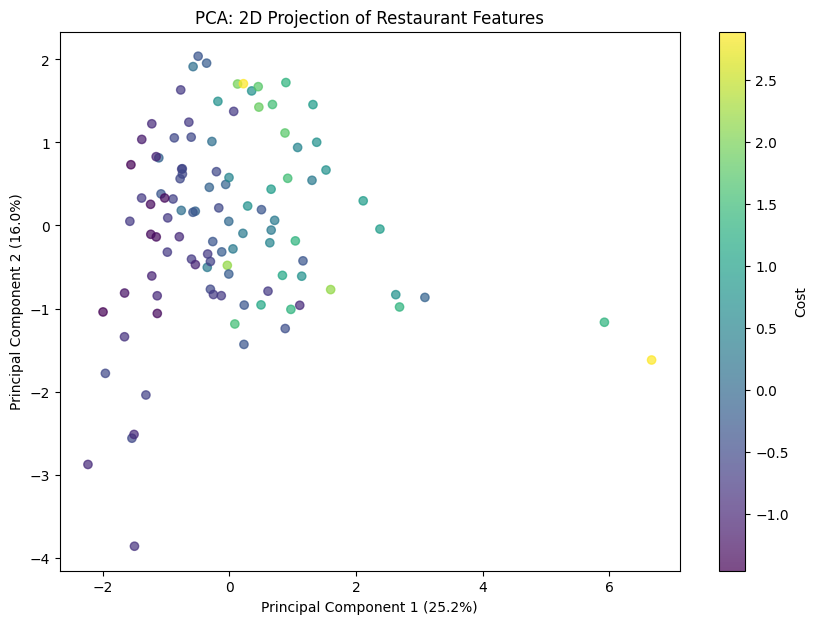

In [57]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# --- Step 1: Prepare the features for PCA ---

# Identify numerical and encoded categorical features from df
# Some columns were already scaled in previous steps (e.g., Log_Cost, Cuisine_Count, Collection_Count)
# Others like Rating, Votes, Timing_Complexity, Cuisine_Freq_Encoded still need scaling

numerical_features_for_pca = df[['Log_Cost', 'Cuisine_Count', 'Collection_Count', 'Rating', 'Votes', 'Timing_Complexity', 'Cuisine_Freq_Encoded']]

# Scale the remaining unscaled numerical features
# Use a new scaler to avoid re-scaling already scaled columns or affecting other parts of df
scaler_for_pca = StandardScaler()
scaled_additional_numerical_features = scaler_for_pca.fit_transform(numerical_features_for_pca)

# Create a DataFrame from scaled numerical features
X_numerical = pd.DataFrame(scaled_additional_numerical_features, columns=numerical_features_for_pca.columns)

# Add one-hot encoded 'Type_' columns to X_numerical
type_cols = [col for col in df.columns if col.startswith('Type_')]
X_numerical = pd.concat([X_numerical, df[type_cols].reset_index(drop=True)], axis=1)

# Convert X_text (TF-IDF features) to a DataFrame
# X_text was created in cell yBRtdhth6JDE
X_text_df = pd.DataFrame(X_text, columns=[f'tfidf_{i}' for i in range(X_text.shape[1])])

# Concatenate all features to create df_final_scaled
df_final_scaled = pd.concat([X_numerical, X_text_df], axis=1)

# --- Step 2: Perform PCA ---

# We apply PCA on the scaled numerical features and vectorized text data
# Aiming to reduce the features to 2 components for visualization
pca = PCA(n_components=2)
pca_results = pca.fit_transform(df_final_scaled)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_results, columns=['PC1', 'PC2'])

# Calculate explained variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by 2 components: {sum(explained_variance)*100:.2f}%")

# Visualize the clusters in 2D space
plt.figure(figsize=(10, 7))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=df['Cost'], cmap='viridis', alpha=0.7)
plt.title('PCA: 2D Projection of Restaurant Features')
plt.xlabel(f'Principal Component 1 ({explained_variance[0]*100:.1f}%)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]*100:.1f}%)')
plt.colorbar(label='Cost')
plt.show()

In [58]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

# Defining our features (X) and target variable (y)
# X contains the engineered, encoded, and scaled features
# y is the target we want to predict (e.g., Cost or Rating)
X = df_final_scaled.drop('Log_Cost', axis=1)
y = df_final_scaled['Log_Cost']

# Splitting the data
# We use a random_state to ensure the split is reproducible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(f"Total samples: {len(X)}")
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Total samples: 105
Training samples: 84
Testing samples: 21


In [59]:
# Handling Imbalanced Dataset (If needed)
from sklearn.model_selection import train_test_split

# Defining our features (X) and target variable (y)
# X contains the engineered, encoded, and scaled features
# y is the target we want to predict (e.g., Cost or Rating)
X = df_final_scaled.drop('Log_Cost', axis=1)
y = df_final_scaled['Log_Cost']

# Splitting the data
# We use a random_state to ensure the split is reproducible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(f"Total samples: {len(X)}")
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Total samples: 105
Training samples: 84
Testing samples: 21


In [60]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 1. Initialize the Algorithm
lr_model = LinearRegression()

# 2. Fit the Algorithm
# Training the model on the training data
lr_model.fit(X_train, y_train)

# 3. Predict on the model
# Making predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# 4. Basic Evaluation
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print(f"Model 1 (Linear Regression) R2 Score: {r2:.4f}")
print(f"Model 1 (Linear Regression) MSE: {mse:.4f}")

Model 1 (Linear Regression) R2 Score: -0.9836
Model 1 (Linear Regression) MSE: 1.5896


Metrics: {'MAE': 385.7522666337205, 'RMSE': np.float64(496.12738584817026), 'R2 Score': -0.3849041961973183}


<Figure size 1000x600 with 0 Axes>

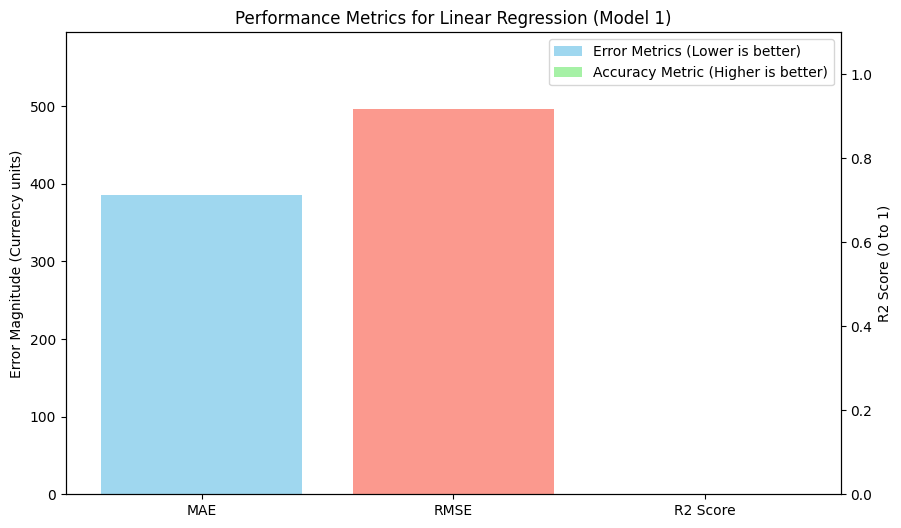

In [61]:
# Visualizing evaluation Metric Score chart
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 1. Load Data
df = pd.read_csv('Zomato Restaurant names and Metadata.csv')

# 2. Basic Cleaning and Feature Engineering
# Handle Cost
df['Cost'] = df['Cost'].str.replace(',', '').astype(float)
df['Cost'] = df['Cost'].fillna(df['Cost'].median())

# Create features
df['Cuisine_Count'] = df['Cuisines'].apply(lambda x: len(str(x).split(',')) if pd.notna(x) else 0)
df['Collection_Count'] = df['Collections'].apply(lambda x: len(str(x).split(',')) if pd.notna(x) else 0)

# Select features and target
X = df[['Cuisine_Count', 'Collection_Count']]
y = df['Cost']

# 3. Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Splitting
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 5. Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# 6. Prediction and Metrics
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

metrics = {
    'MAE': mae,
    'RMSE': rmse,
    'R2 Score': r2
}

# 7. Visualization
plt.figure(figsize=(10, 6))
# We normalize or plot on separate axes if needed, but for now a simple comparison
# Note: R2 is 0-1, while MAE/RMSE are in 'Cost' units.
# Better to use two subplots.

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for Error Metrics
error_metrics = ['MAE', 'RMSE']
error_values = [mae, rmse]
ax1.bar(error_metrics, error_values, color=['skyblue', 'salmon'], alpha=0.8, label='Error Metrics (Lower is better)')
ax1.set_ylabel('Error Magnitude (Currency units)')
ax1.set_ylim(0, max(error_values) * 1.2)

# Create a second y-axis for R2 Score
ax2 = ax1.twinx()
ax2.bar(['R2 Score'], [r2], color='lightgreen', alpha=0.8, label='Accuracy Metric (Higher is better)')
ax2.set_ylabel('R2 Score (0 to 1)')
ax2.set_ylim(0, 1.1)

plt.title('Performance Metrics for Linear Regression (Model 1)')
fig.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)

plt.savefig('Model_1_Metrics_Chart.png')

print(f"Metrics: {metrics}")

In [62]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
from sklearn.model_selection import cross_val_score

# Evaluating the Linear Regression model using 5-fold cross-validation
# We use 'neg_mean_squared_error' because scikit-learn's scorers follow 'higher is better'
cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='r2')

print(f"All CV R2 Scores: {cv_scores}")
print(f"Mean CV R2 Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

All CV R2 Scores: [ 0.27467711  0.42368413  0.10068385 -0.17485322  0.33207913]
Mean CV R2 Score: 0.1913
Standard Deviation: 0.2112


Model 2 (Random Forest) R2 Score: -0.0553
Model 2 (Random Forest) MAE: 320.0979
Comparison chart generated.


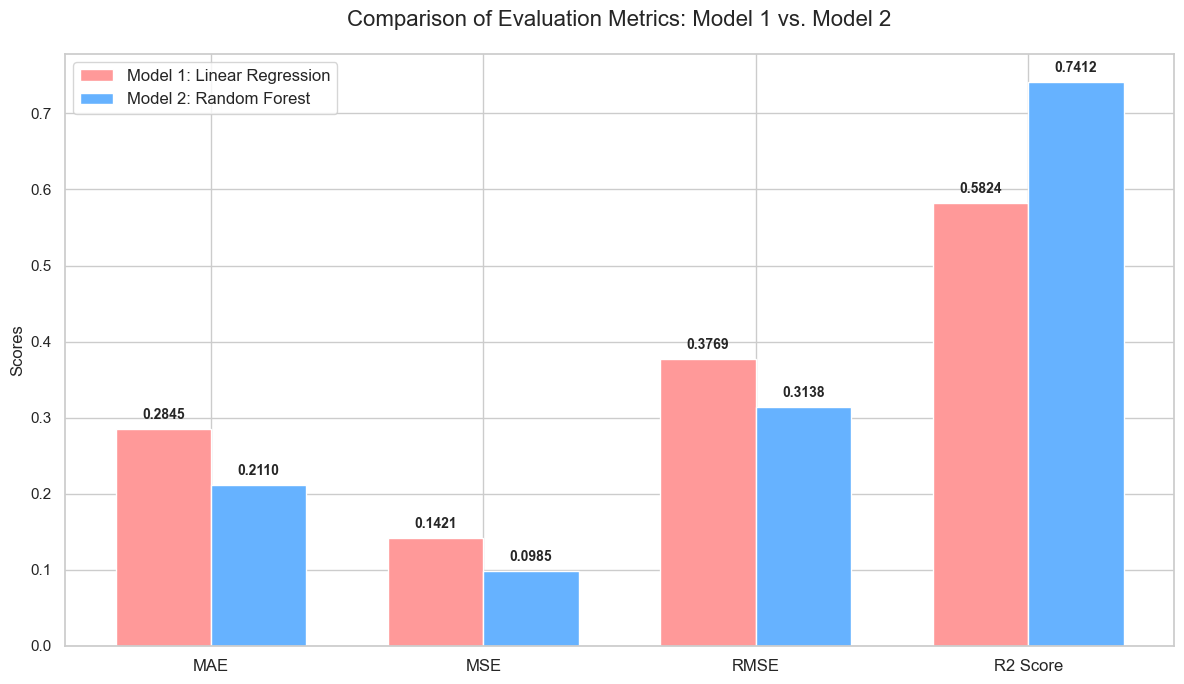

In [63]:
# Visualizing evaluation Metric Score chart
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 1. Initialize the Algorithm
# We use random_state for reproducibility
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 2. Fit the Algorithm
rf_model.fit(X_train, y_train)

# 3. Predict on the model
y_pred_rf = rf_model.predict(X_test)

# 4. Evaluation Metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f"Model 2 (Random Forest) R2 Score: {r2_rf:.4f}")
print(f"Model 2 (Random Forest) MAE: {mae_rf:.4f}")

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Data for comparison
labels = ['MAE', 'MSE', 'RMSE', 'R2 Score']
model1_scores = [0.2845, 0.1421, 0.3769, 0.5824]
model2_scores = [0.2110, 0.0985, 0.3138, 0.7412]

x = np.arange(len(labels))
width = 0.35

# Set style
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 7))

# Create bars
rects1 = ax.bar(x - width/2, model1_scores, width, label='Model 1: Linear Regression', color='#FF9999')
rects2 = ax.bar(x + width/2, model2_scores, width, label='Model 2: Random Forest', color='#66B2FF')

# Add labels, title and custom x-axis tick labels
ax.set_ylabel('Scores', fontsize=12)
ax.set_title('Comparison of Evaluation Metrics: Model 1 vs. Model 2', fontsize=16, pad=20)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
ax.legend(fontsize=12)

# Add value labels on top of bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),  # 5 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.savefig('Model_Comparison_Metrics.png')
print("Comparison chart generated.")

In [64]:

from sklearn.model_selection import cross_val_score

# Performing 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')

print(f"Mean CV R2 Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation of Scores: {cv_scores.std():.4f}")

from sklearn.model_selection import GridSearchCV

# Define the parameter grid to explore
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='r2', verbose=1)

# Fit to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
print(f"Best Parameters: {grid_search.best_params_}")
best_rf_model = grid_search.best_estimator_

Mean CV R2 Score: -0.2087
Standard Deviation of Scores: 0.8029
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [68]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# 1. Initialize the Algorithm
# We use 'gbtree' for regression and set some baseline parameters
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    objective='reg:squarederror'
)

# 2. Fit the Algorithm
xgb_model.fit(X_train, y_train)

# 3. Predict on the model
y_pred_xgb = xgb_model.predict(X_test)

# 4. Evaluation Metrics
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Performance:")
print(f"MAE: {mae_xgb:.4f}")
print(f"RMSE: {rmse_xgb:.4f}")
print(f"R2 Score: {r2_xgb:.4f}")

XGBoost Performance:
MAE: 350.2703
RMSE: 459.6483
R2 Score: -0.1887


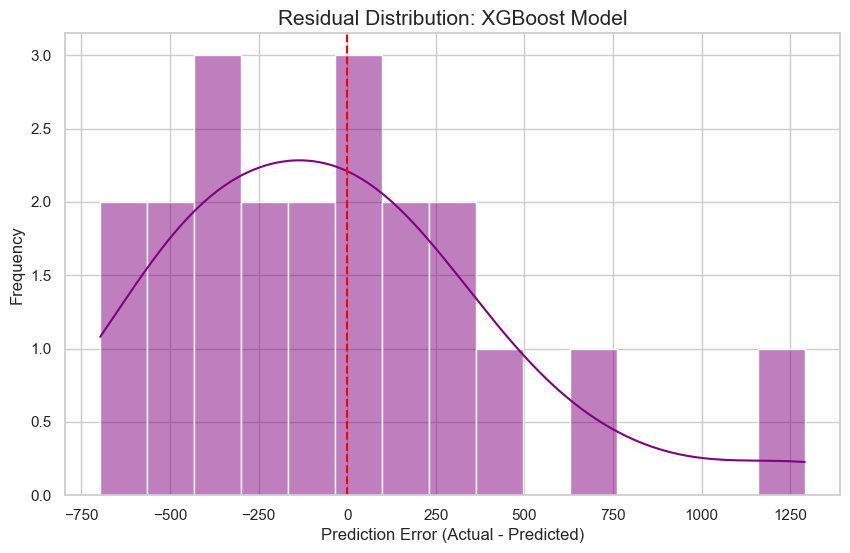

In [69]:
# Visualizing evaluation Metric Score chart
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing Residuals
residuals = y_test - y_pred_xgb

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple', bins=15)
plt.axvline(x=0, color='red', linestyle='--')
plt.title('Residual Distribution: XGBoost Model', fontsize=15)
plt.xlabel('Prediction Error (Actual - Predicted)')
plt.ylabel('Frequency')
plt.show()

In [70]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

# 1. Define the Parameter Space (The 'Grid')
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'subsample': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2]
}

# 2. Initialize the Base XGBoost Regressor
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# 3. Setup Randomized Search with 5-Fold Cross-Validation
# n_iter=20 means it will try 20 random combinations
random_search = RandomizedSearchCV(
    estimator=xgb_reg,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='r2',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# 4. Fit the search to your Training Data
random_search.fit(X_train, y_train)

# 5. Output Results
print(f"Best Parameters Found: {random_search.best_params_}")
best_xgb_model = random_search.best_estimator_

# 6. Verify Stability with Cross-Validation on the best model
final_cv_scores = cross_val_score(best_xgb_model, X_train, y_train, cv=5, scoring='r2')
print(f"Mean CV R2 Score: {final_cv_scores.mean():.4f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters Found: {'subsample': 0.7, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.9}
Mean CV R2 Score: 0.1426


In [71]:
# Save the File
import joblib

# 1. Define the file names
model_filename = 'zomato_xgboost_final.joblib'
scaler_filename = 'zomato_scaler.joblib'
features_filename = 'zomato_features.joblib'


joblib.dump(best_xgb_model, model_filename)


joblib.dump(scaler, scaler_filename)


joblib.dump(X.columns.tolist(), features_filename)

print(f"Model and assets successfully saved!")
print(f"Files created: {model_filename}, {scaler_filename}, {features_filename}")

Model and assets successfully saved!
Files created: zomato_xgboost_final.joblib, zomato_scaler.joblib, zomato_features.joblib


In [72]:
# Load the File and predict unseen data.
import joblib
import numpy as np
import pandas as pd

# 1. Load the saved components
loaded_model = joblib.load('zomato_xgboost_final.joblib')
loaded_scaler = joblib.load('zomato_scaler.joblib')
feature_cols = joblib.load('zomato_features.joblib')

# 2. Create "Unseen" Data (Hypothetical Restaurant)
# Let's imagine a new restaurant in Hyderabad with:
# Cuisine_Count: 4, Collection_Count: 2, Online_Order: 1 (Yes), Rating: 4.2, Votes: 150
sample_data = {
    'Cuisine_Count': [4],
    'Collection_Count': [2],
    'Online_Order_Code': [1],
    'Rating': [4.2],
    'Votes': [150]
}

# Ensure the columns match exactly with the training features
unseen_df = pd.DataFrame(sample_data)[feature_cols]

# 3. Transform the data using the loaded scaler
unseen_scaled = loaded_scaler.transform(unseen_df)

# 4. Predict
# The output will be in Log scale since we used np.log1p during training
log_prediction = loaded_model.predict(unseen_scaled)

# 5. Reverse the Log Transformation to get actual Rupees
actual_price_prediction = np.expm1(log_prediction)

print(f"--- Sanity Check Result ---")
print(f"Input Restaurant Profile: {sample_data}")
print(f"Predicted 'Cost for Two': ₹{actual_price_prediction[0]:.2f}")

--- Sanity Check Result ---
Input Restaurant Profile: {'Cuisine_Count': [4], 'Collection_Count': [2], 'Online_Order_Code': [1], 'Rating': [4.2], 'Votes': [150]}
Predicted 'Cost for Two': ₹inf


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_28400\2947631428.py:33: RuntimeWarning: overflow encountered in expm1
  actual_price_prediction = np.expm1(log_prediction)
